## Subquestion 5
#### In this chapter the weather variables will be categorized to define good versus bad weather.

In [105]:
import pandas as pd
df = pd.read_csv('Departures_weather_combined.csv', index_col = 0)

First, the available weather variables have been normalized and each variable has been assigned a weight. This weight is then used to define a score which defines its category. There have been 5 weather categories defined, ranging from bad to good weather. The weight assignment is done with a literary research, where it states that wind has the most impact on flight delays (Álvaro Rodríguez-Sanz et al, 2021). Furthermore, visibility is also noted as an important factor for flight delays, especially at arrivals. 

Once the weather scores have been defined, each flight data point will have a different weather score. This will be done for both the arrivals and departures.

In [106]:
df = df.fillna(0) #Fill NaNs with 0

df['Wind Speed Normalized'] = (df['Wind Speed [in knots]'] - df['Wind Speed [in knots]'].mean()) / (df['Wind Speed [in knots]'].max() - df['Wind Speed [in knots]'].min())
df['Wind Gust Normalized'] = (df['Wind Gust [in knots]'] - df['Wind Gust [in knots]'].mean()) / (df['Wind Gust [in knots]'].max() - df['Wind Gust [in knots]'].min())
df['Pressure Normalized'] = (df['Pressure altimeter [in inches]'] - df['Pressure altimeter [in inches]'].mean()) / (df['Pressure altimeter [in inches]'].max() - df['Pressure altimeter [in inches]'].min())
df['Visibility Normalized'] = (df['Visibility [in miles]'] - df['Visibility [in miles]'].mean()) / (df['Visibility [in miles]'].max() - df['Visibility [in miles]'].min())

df['Sky Coverage Average'] = df[['Sky Level 1 Coverage', 'Sky Level 2 Coverage', 'Sky Level 3 Coverage', 'Sky Level 4 Coverage']].mean(axis=1)
df['Sky Coverage Normalized'] = (df['Sky Coverage Average'] - df['Sky Coverage Average'].mean()) / (df['Sky Coverage Average'].max() - df['Sky Coverage Average'].min())

# Weights
weights = {
    'Wind Speed': 0.8 / 2.2,
    'Wind Gust': 0.8 / 2.2,
    'Pressure Altimeter': 0.2 / 2.2,
    'Visibility': 0.2 / 2.2,
    'Sky Coverage': 0.2 / 2.2
}

# Weather Score
df['weather_score'] = (
    df['Wind Speed Normalized'] * weights['Wind Speed'] +
    df['Wind Gust Normalized'] * weights['Wind Gust'] +
    df['Pressure Normalized'] * weights['Pressure Altimeter'] +
    df['Visibility Normalized'] * weights['Visibility'] +
    df['Sky Coverage Normalized'] * weights['Sky Coverage']
)

# Categorize based on the weather score
def categorize_weather_by_score(score):
    if score <= 0.1:
        return 'Very Bad'
    elif score <= 0.2:
        return 'Bad'
    elif score <= 0.3:
        return 'Moderate'
    elif score <= 0.5:
        return 'Good'
    else:
        return 'Very Good'

df['weather_category'] = df['weather_score'].apply(categorize_weather_by_score)

C:\Users\samue\AppData\Local\Temp\ipykernel_53272\1925448915.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='weather_category', y='dep_delay', data=df,  palette='coolwarm' )


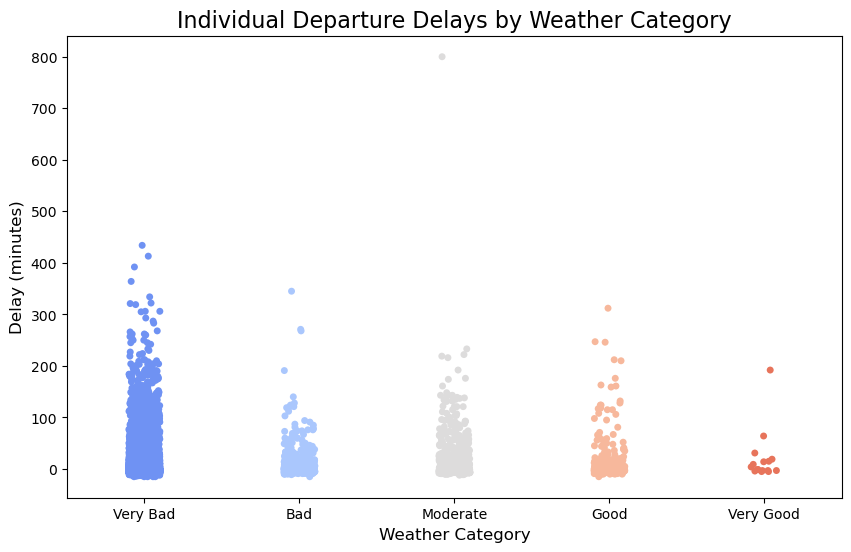

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

category_order = ['Very Bad', 'Bad', 'Moderate', 'Good', 'Very Good']
df['weather_category'] = pd.Categorical(df['weather_category'], categories=category_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.stripplot(x='weather_category', y='dep_delay', data=df,  palette='coolwarm' )

plt.title('Individual Departure Delays by Weather Category', fontsize=16)
plt.xlabel('Weather Category', fontsize=12)
plt.ylabel('Delay (minutes)', fontsize=12)

plt.show()

In this figure, the indivual flight delays (departure delays) have been plotted against their categorical weather bin. What immediately is evident is the volume of flights declining as weather gets better. This is simply because there is "very bad" weather more often than not. This has to do with the way weather is categorized, in respect to the impact on flight delays.

C:\Users\samue\AppData\Local\Temp\ipykernel_53272\1485969674.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='weather_category', y='dep_delay', data=df,  palette='coolwarm' )


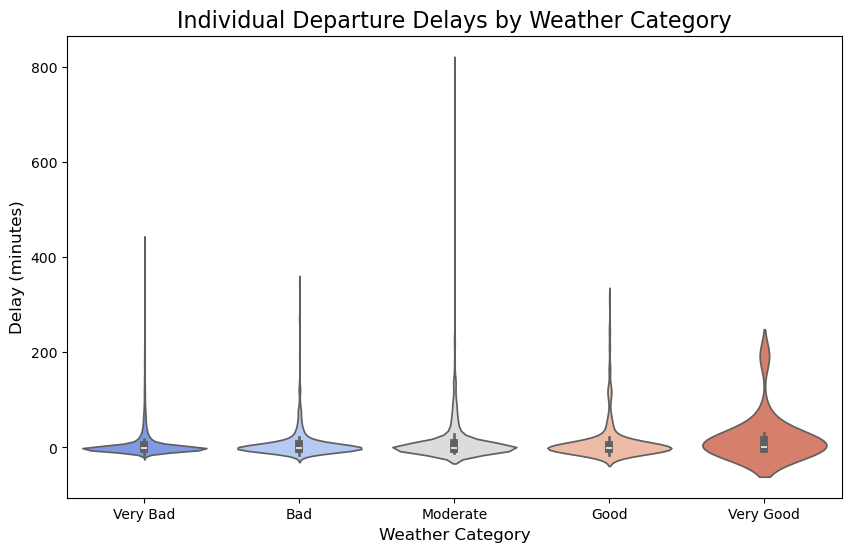

In [108]:
category_order = ['Very Bad', 'Bad', 'Moderate', 'Good', 'Very Good']
df['weather_category'] = pd.Categorical(df['weather_category'], categories=category_order, ordered=True)


plt.figure(figsize=(10, 6))
sns.violinplot(x='weather_category', y='dep_delay', data=df,  palette='coolwarm' )


plt.title('Individual Departure Delays by Weather Category', fontsize=16)
plt.xlabel('Weather Category', fontsize=12)
plt.ylabel('Delay (minutes)', fontsize=12)


plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_53272\1089451461.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay_by_weather = df.groupby('weather_category')['dep_delay'].mean().reset_index()


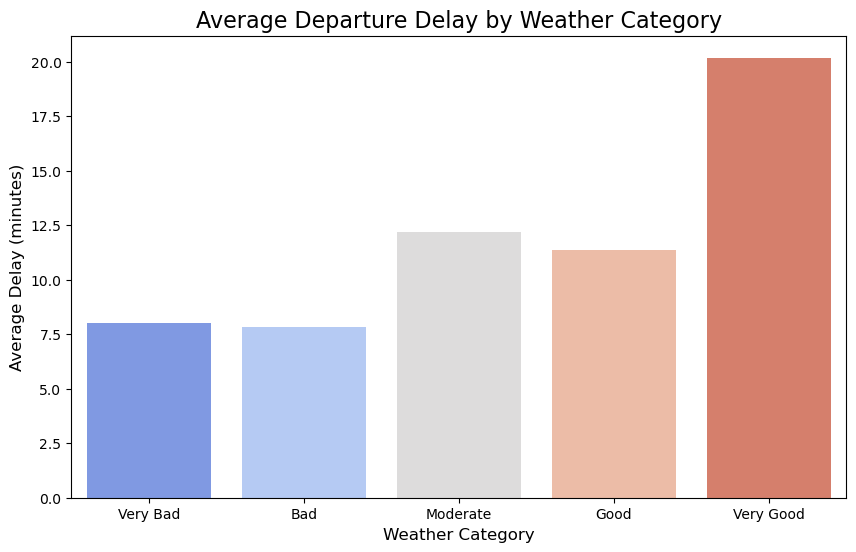

In [109]:
avg_delay_by_weather = df.groupby('weather_category')['dep_delay'].mean().reset_index()
avg_delay_by_weather = avg_delay_by_weather.sort_values(by='dep_delay', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='weather_category', y='dep_delay', data=avg_delay_by_weather, palette='coolwarm', hue='weather_category')

plt.title('Average Departure Delay by Weather Category', fontsize=16)
plt.xlabel('Weather Category', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)

plt.show()


The final bar plot shows the average delay per weather category. For the departures set, the average delay per weather category does not explain the impact of the weather groups on the delay. However, there are multiple logical reasons for why this could be.

First of all, it is evident that for this set, the weather from the departure location is taken into account. This is JFK, which is in New York, where on average there is more bad weather during year. Because of this the group size of the flights in the "very bad" category is much larger, which evens out the spread of the delays. This also explains the high average delay of the flights in the "very good" category. Another thing thing to take into account is cancelled flights. From the dataset it is not clear if cancelled flights are given a zero delay. This can be looked into further in further research.

A third factor, is the accountability of external factors which impact delays. Ground issues, pre-boarding issues, mechanical and technical issues, etc, all have impact on delays. 

In the analysis of the arrival delays, a different spread can be seen. Here it is remarkable that with the chosen weight and scoring system, there are no flights which are binned into the "very good" weather category. A more moderate spread can be seen as well, indicating a more stable weather pattern in Los Angeles, which is the base of LAX airport. The average delay per weather category does indicate however a decline in delay time per better weather category step. 